In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('model/pixel_cnn')

In [4]:
h = 28
w = 28
grid_row = 5
grid_col = 5
batch = grid_row * grid_col
images = np.ones((batch, h, w, 1), dtype=np.float32)
images[0].shape

(28, 28, 1)

In [5]:
for row in range(h):
    for col in range(w):
        prob = model.predict(images)[:, row,col, 0]
        pixel_samples = tf.random.categorical(tf.math.log(np.stack([1-prob, prob], 1)), 1)
        images[:,row,col,0] = tf.reshape(pixel_samples, [batch])

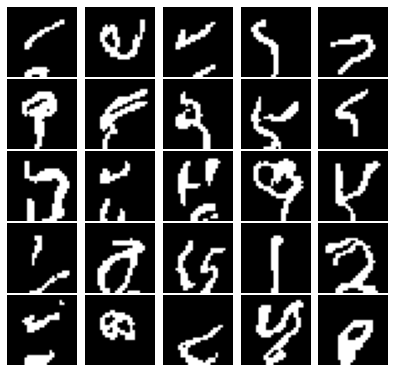

In [6]:
f, axarr = plt.subplots(grid_row, grid_col, figsize=(grid_col * 1.1, grid_row))

i = 0
for row in range(grid_row):
    for col in range(grid_col):
        axarr[row,col].imshow(images[i, :, :, 0], cmap='gray')
        axarr[row,col].axis('off')
        i += 1

f.tight_layout(pad=0.1, h_pad=0.2, w_pad=0.1)